In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
ks_dat = pd.read_csv('/home/ndh0004/code/coge_tools/test_out/bog_sep17_bag_of_genes.tsv', sep="\t")


the data has been read in, but the cols are not named. This will not do. 

In [50]:
names = [
"call",
"pgene",
"ctregion_chrom",
"ctregion_start",
"ctregion_stop",
"ptregion_chrom",
"ptregion_start",
"ptregion_stop",
"perid",
"meanperid",
"ks",
"meanks",
"cgene",
"cgregion_chrom",
"cgregion_start",
"cgregion_stop",
"pgregion_chrom",
"pgregion_start",
"pgregion_stop",
"ka",
"meanka",
"perid_len",
"ka_len",
"ks_len",
"syn_len"]

In [51]:
ks_dat.columns = names


Now that we have names for columns we can begin to work with data. 


In [52]:
ks_measured = ks_dat.loc[~ks_dat['ks'].isin(['None','NA','none','nan','na'])]

We have thrown out all unmeasured ks values. It is time to do some graphing

In [53]:
print(ks_measured.head())

  call  pgene       ctregion_chrom  ctregion_start  ctregion_stop  \
0    B  g3318  Super-Scaffold_4803          191274         520039   
1  NaN  g3318  Super-Scaffold_2412         3305791        3762848   
2  NaN  g3318    Super-Scaffold_25         2248306        2650744   
3    A  g8544   Super-Scaffold_159         2646893        2732578   
4    B  g8544   Super-Scaffold_435         3124933        3280577   

  ptregion_chrom  ptregion_start  ptregion_stop  perid  meanperid   ...     \
0     scaffold23          388286         710240  96.95  95.785882   ...      
1     scaffold23          427000         710240  75.00  76.477143   ...      
2     scaffold23          429266         706058  75.76  77.102667   ...      
3     scaffold83          224592         298605  99.83  99.681000   ...      
4     scaffold83          224592         330639  96.97  96.552500   ...      

   cgregion_stop pgregion_chrom pgregion_start pgregion_stop      ka  \
0         250950     scaffold23         4450

In [54]:
print(ks_measured.describe())

       ctregion_start  ctregion_stop  ptregion_start  ptregion_stop  \
count    3.171200e+04   3.171200e+04    3.171200e+04   3.171200e+04   
mean     2.307265e+06   2.500627e+06    1.531279e+05   3.192925e+05   
std      2.457347e+06   2.458486e+06    2.189327e+05   2.636353e+05   
min      1.000000e+00   2.214300e+04    0.000000e+00   1.741500e+04   
25%      4.998130e+05   7.245790e+05    1.494800e+04   1.419290e+05   
50%      1.466822e+06   1.671631e+06    7.496300e+04   2.427460e+05   
75%      3.305791e+06   3.478591e+06    2.115060e+05   4.148780e+05   
max      1.341224e+07   1.354764e+07    2.067507e+06   2.231986e+06   

              perid     meanperid           ks  cgregion_start  cgregion_stop  \
count  31712.000000  31712.000000  7028.000000    3.171200e+04   3.171200e+04   
mean      94.423958     94.423951    12.875402    2.402919e+06   2.405785e+06   
std        8.599650      7.600597    22.000164    2.458124e+06   2.458102e+06   
min       54.290000     64.876667   

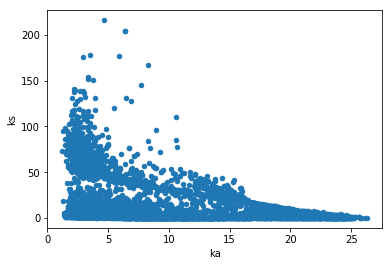

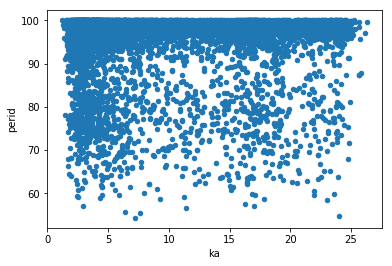

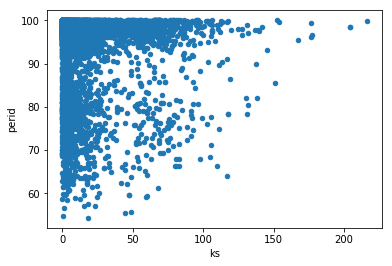

In [66]:
ks_measured.plot(x='ka', y='ks',
                 kind='scatter')
ks_measured.plot(x='ka', y='perid',
                 kind='scatter')
ks_measured.plot(x='ks', y='perid',
                 kind='scatter')

In [31]:
numeric_ksmean =  ks_dat.loc[~ks_dat['meanks'].isin(['None','NA','none',
                                                     'nan',
                                                     'na',
                                                     'NaN'])]

In [56]:
print(numeric_ksmean['meanks'].describe())

count       8086
unique       549
top       0.1484
freq          75
Name: meanks, dtype: object


In [57]:
print(numeric_ksmean['meanka'].describe())

count     8086
unique       1
top       None
freq      8086
Name: meanka, dtype: object


In [58]:
print(numeric_ksmean['meanka'].head())

1     None
4     None
8     None
12    None
13    None
Name: meanka, dtype: object


In [59]:
print(numeric_ksmean['meanks'].head())

1       0.0935
4       0.4652
8       0.0765
12    0.181025
13      0.1933
Name: meanks, dtype: object


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3559906a20>]],
      dtype=object)

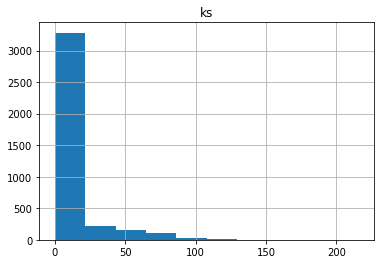

In [60]:
numeric_ksmean.hist(column='ks')

`>awk 'OFS=","{print $3"_"$4"_"$5,$12, $10}' bog_sep17_bag_of_genes.tsv | grep -v None | sort | uniq >reg_meaks_meanpid.tsv

`
having trouble getting the exact right filtering. I can figure it out later in pandas. Right now this will do.

In [61]:
meanks_by_region = pd.read_csv(
    '/home/ndh0004/code/coge_tools/test_out/reg_meaks_meanpid.tsv',
    sep=','
 )
names = ['reg','meanks','meanpid']
meanks_by_region.columns = names
print(meanks_by_region.head())

                                  reg    meanks    meanpid
0    Super-Scaffold_1001_62754_996149  0.523000  72.532000
1  Super-Scaffold_100_1639010_1735612  0.103000  94.393333
2  Super-Scaffold_100_2163878_2241669  1.318800  98.642857
3  Super-Scaffold_100_2478074_2554807  1.256550  96.948750
4  Super-Scaffold_100_2615283_2839250  1.544567  93.065000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f355a752550>]],
      dtype=object)

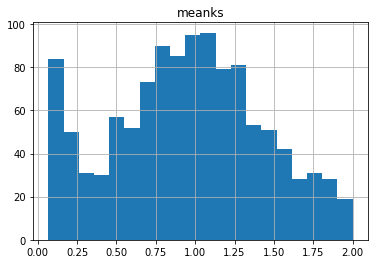

In [63]:
meanks_by_region.hist(column='meanks',
                      bins=20)

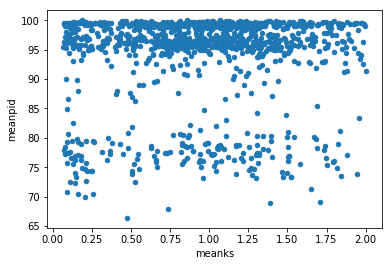

In [64]:
meanks_by_region.plot(x='meanks', y='meanpid',
                      kind='scatter')

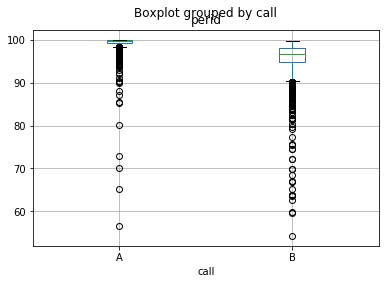

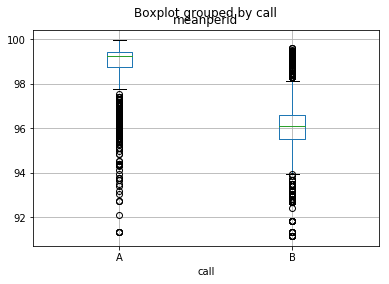

In [70]:
calls = ks_dat.loc[ks_dat['call'].isin(['A','B'])]
calls.boxplot(by='call', column='perid')
calls.boxplot(by='call',column='meanperid')

so filtering by block worked (ish) we still pull in a fair a number of low indvidual
regions. This is not ideal. It may be better to move cutoff to perid filtering. 

`dS goes from 0 to infinity, not from 0 to 1.  It is the number of changes per site.
Large dS is hard to estimate, whatever method you use.  If you have on average more than 1 or 2 changes per site, it will be difficult to decide precisely how many changes have occurred, because the sequences are too divergent anyway.
If you have other species/sequences, you can include them and use codeml to analyse the sequence alignment on a tree.  This way the long distance is broken into multiple branches so that the method is more tolerant of multiple changes at the same site.
Ziheng` 
![link](:https://groups.google.com/forum/#!msg/pamlsoftware/kZFXh2hs9DE/p9NeuaD0AgAJ;context-place=forum/pamlsoftware)